#Inport Libraries


In [2]:
import pandas as pd #thao tác, phân tích dữ liệu
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter("ignore")


In [3]:
data = pd.read_csv("LanguageDetection.csv") #load dataset vào DataFrame
print(data.head(10))

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English
8  [5][6] With the Industrial revolution, nature ...  English
9  However, a vitalist vision of nature, closer t...  English


In [4]:
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [5]:
X = data["Text"]
y = data["Language"]

In [9]:
# converting categorical variables to numerica (chuyển biến phân loại về số, tức là chuyển các label trong language về dạng số)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


#Text preprocessing


In [11]:
# tạo danh sách chứa các text đã qua xử lý
data_list = []
# duyệt text từ X
for text in X:
       # xoá các ký tự và số
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # chuyển tất cả chữ về chữ in thường
        text = text.lower()
        # thêm vào data_list
        data_list.append(text)

#Bag of Words

In [12]:
# tạo Bag of Words (BOW) bằng countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#Model creation and Prediction


In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(x_test)

#Evaluating the model


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy is :",ac)


Accuracy is : 0.9796905222437138


In [17]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.96      0.95      0.95        73
           2       0.99      0.98      0.99       111
           3       0.93      1.00      0.96       291
           4       0.96      0.99      0.98       219
           5       0.99      0.96      0.97        93
           6       1.00      0.99      0.99        68
           7       1.00      1.00      1.00        10
           8       0.99      0.99      0.99       145
           9       1.00      0.98      0.99        66
          10       1.00      0.98      0.99       121
          11       0.99      0.97      0.98       144
          12       1.00      0.99      0.99       136
          13       0.97      0.97      0.97       160
          14       0.99      0.98      0.99       133
          15       1.00      0.99      0.99        87
          16       1.00      0.92      0.96       105

    accuracy              

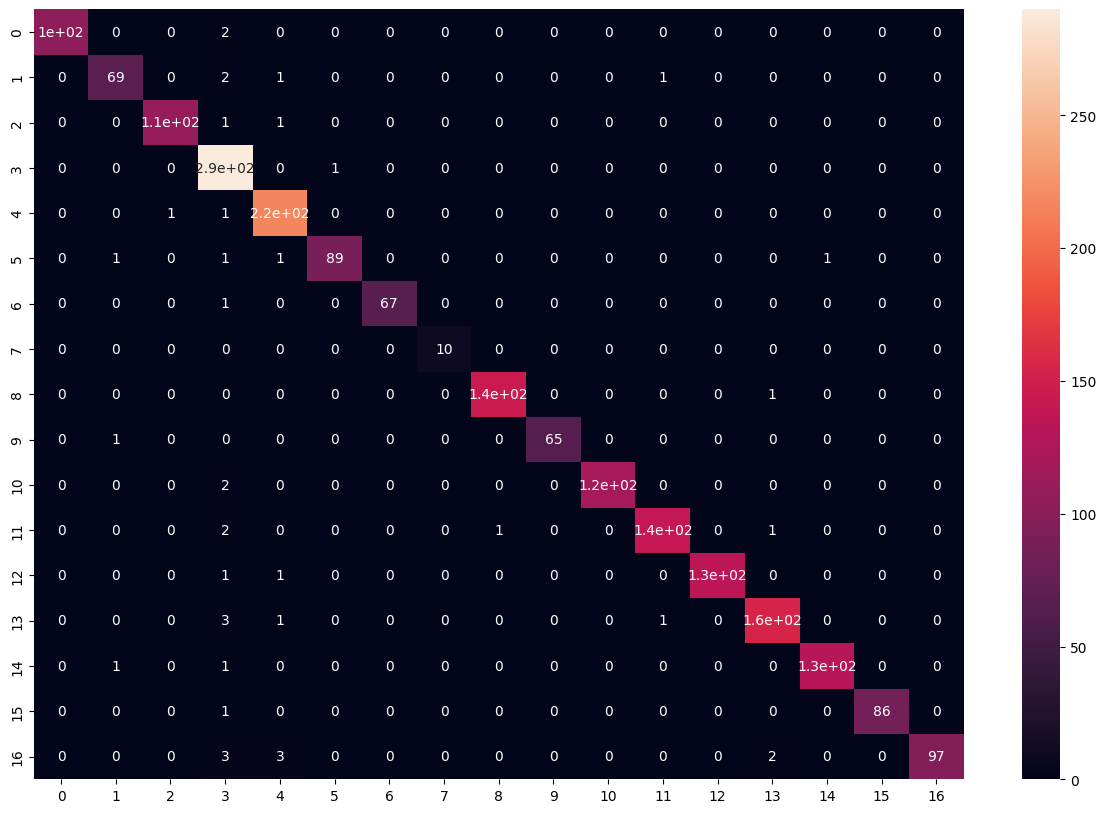

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [19]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language


In [20]:
# English
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")
# Spanish
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")
# Russian
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian


In [21]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))